In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import DataLoader
from medmnist import INFO
from medmnist import BloodMNIST

In [24]:
train_dataset = BloodMNIST(split='train', download=True, size=128, transform=T.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

Using downloaded and verified file: /h/lkcai/.medmnist/bloodmnist_128.npz


In [25]:
info = INFO['bloodmnist']

blood_labels = info['label']
blood_nsamples = info['n_samples']

blood_labels["3"] = 'immature granulocytes'

print(f"Labels of BloodMNIST: {blood_labels}")
print(f"Number of samples: {blood_nsamples}")

Labels of BloodMNIST: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}


[852, 2181, 1085, 2026, 849, 993, 2330, 1643]


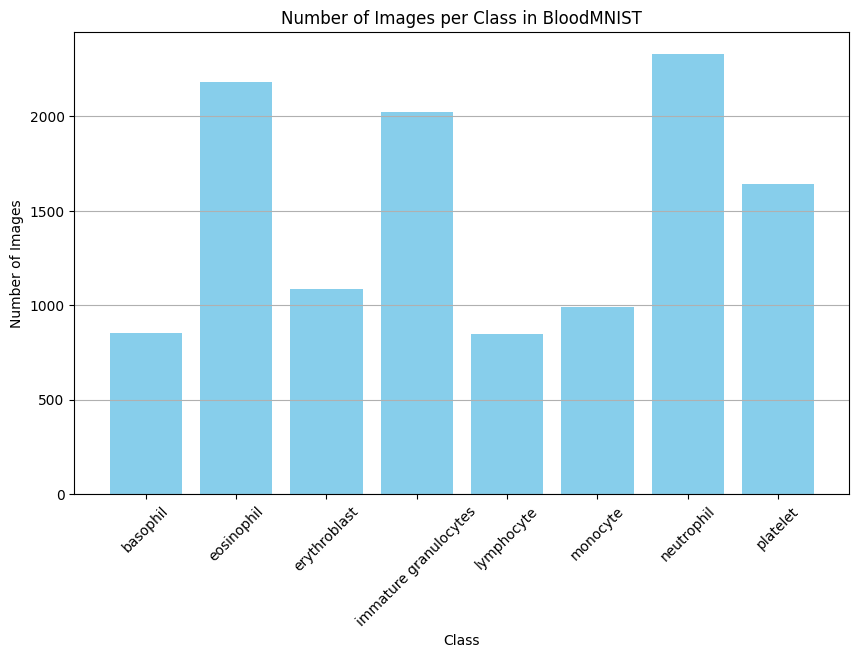

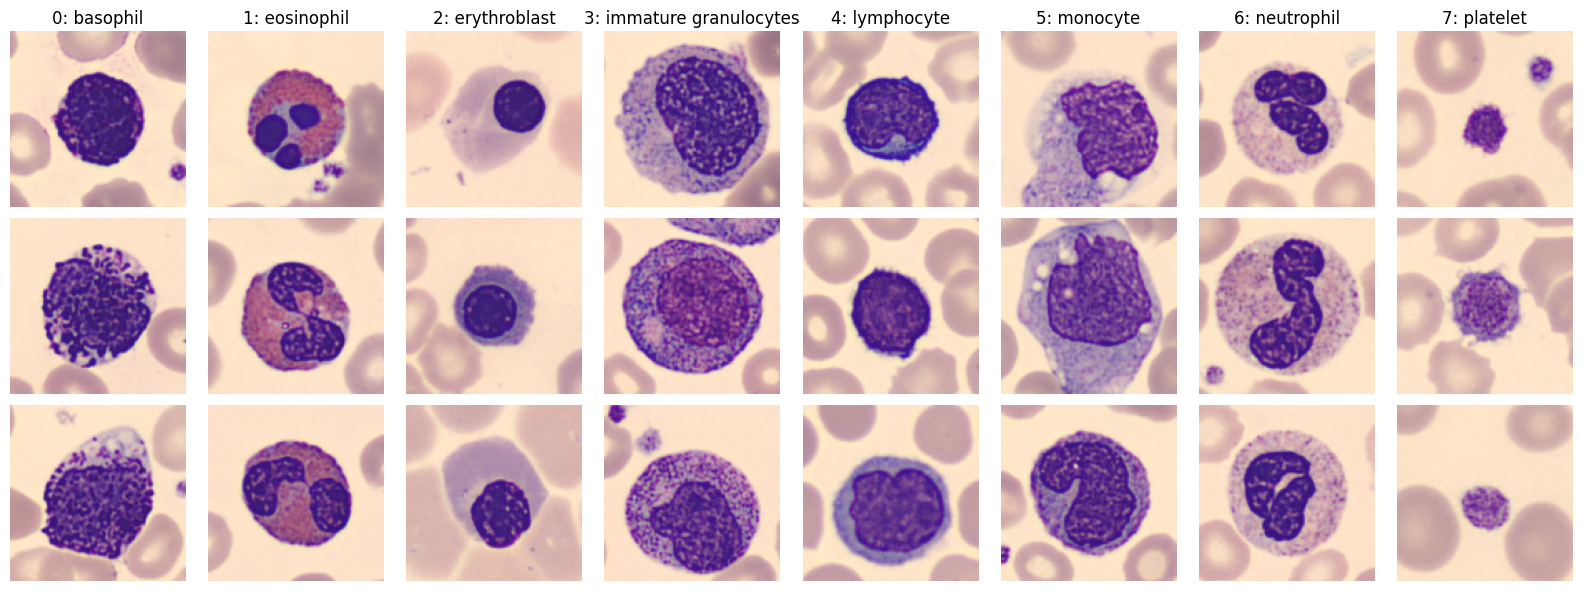

In [28]:
class_counts = [0] * len(blood_labels)
class_images = {i: [] for i in range(len(blood_labels))}

for image, label in train_loader:
    label = int(label.item())
    class_counts[label] += 1
    if len(class_images[label]) < 3:
        class_images[label].append(image.squeeze().numpy())

print(class_counts)

plt.figure(figsize=(10, 6))
plt.bar(blood_labels.values(), class_counts, color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in BloodMNIST")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

fig, axes = plt.subplots(3, len(blood_labels), figsize=(16, 6))
for class_id, images in class_images.items():
    for j, img in enumerate(images):
        ax = axes[j, class_id]
        ax.imshow(np.transpose(img, (1, 2, 0)))
        ax.axis('off')
        if j == 0:
            ax.set_title(str(class_id) + ": " + blood_labels[str(class_id)])

plt.tight_layout()
plt.show()